#### 1- Regression - Electricity Price Prediction (Case Study)

We wıll be predicting the electiricity price.

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('electricity.txt',delimiter=',')


C:\Users\Evim Preschool\AppData\Local\Temp\ipykernel_16912\1024973184.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('electricity.txt',delimiter=',')


In [8]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [9]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [11]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(pd.to_numeric, errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                0 non-null      float64
 1   Holiday                 0 non-null      float64
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [13]:
df.isnull().sum()

DateTime                  38014
Holiday                   38014
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        5
SystemLoadEA                  2
SMPEA                         2
ORKTemperature              295
ORKWindspeed                299
CO2Intensity                  7
ActualWindProduction          5
SystemLoadEP2                 2
SMPEP2                        2
dtype: int64

In [14]:
df.corr(numeric_only=True)

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
DateTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HolidayFlag,NaN,NaN,1.000000,-0.124773,-0.003286,0.046133,0.032414,-0.023431,-0.000016,0.086078,-0.056336,-0.000549,-0.097015,0.063268,-0.067414,0.073947,-0.084735,-0.005577
DayOfWeek,NaN,NaN,-0.124773,1.000000,0.007504,-0.004423,0.003056,-0.001196,0.000120,-0.034807,-0.185166,-0.077833,-0.015999,-0.054017,0.028015,-0.031222,-0.191667,-0.069745
WeekOfYear,NaN,NaN,-0.003286,0.007504,1.000000,0.060816,0.971182,-0.237323,-0.000083,0.049317,-0.027254,-0.018261,0.155915,-0.028200,-0.097288,0.065910,-0.041238,-0.016442
Day,NaN,NaN,0.046133,-0.004423,0.060816,1.000000,0.008698,-0.001786,0.000084,0.073624,-0.008627,-0.018567,0.014888,0.086866,-0.084517,0.062776,-0.028229,-0.013629
Month,NaN,NaN,0.032414,0.003056,0.971182,0.008698,1.000000,-0.236833,-0.000087,0.052114,-0.031995,-0.018040,0.150265,-0.028420,-0.107876,0.067856,-0.042769,-0.015551
Year,NaN,NaN,-0.023431,-0.001196,-0.237323,-0.001786,-0.236833,1.000000,-0.000049,-0.052236,-0.081155,0.045344,0.079380,-0.013207,-0.185930,-0.069241,-0.057210,0.046116
PeriodOfDay,NaN,NaN,-0.000016,0.000120,-0.000083,0.000084,-0.000087,-0.000049,1.000000,0.034641,0.608638,0.356302,0.138369,0.088360,-0.176696,0.061301,0.593974,0.323008
ForecastWindProduction,NaN,NaN,0.086078,-0.034807,0.049317,0.073624,0.052114,-0.052236,0.034641,1.000000,0.177009,-0.046271,-0.172943,0.714308,-0.653763,0.953510,0.032739,-0.080172


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

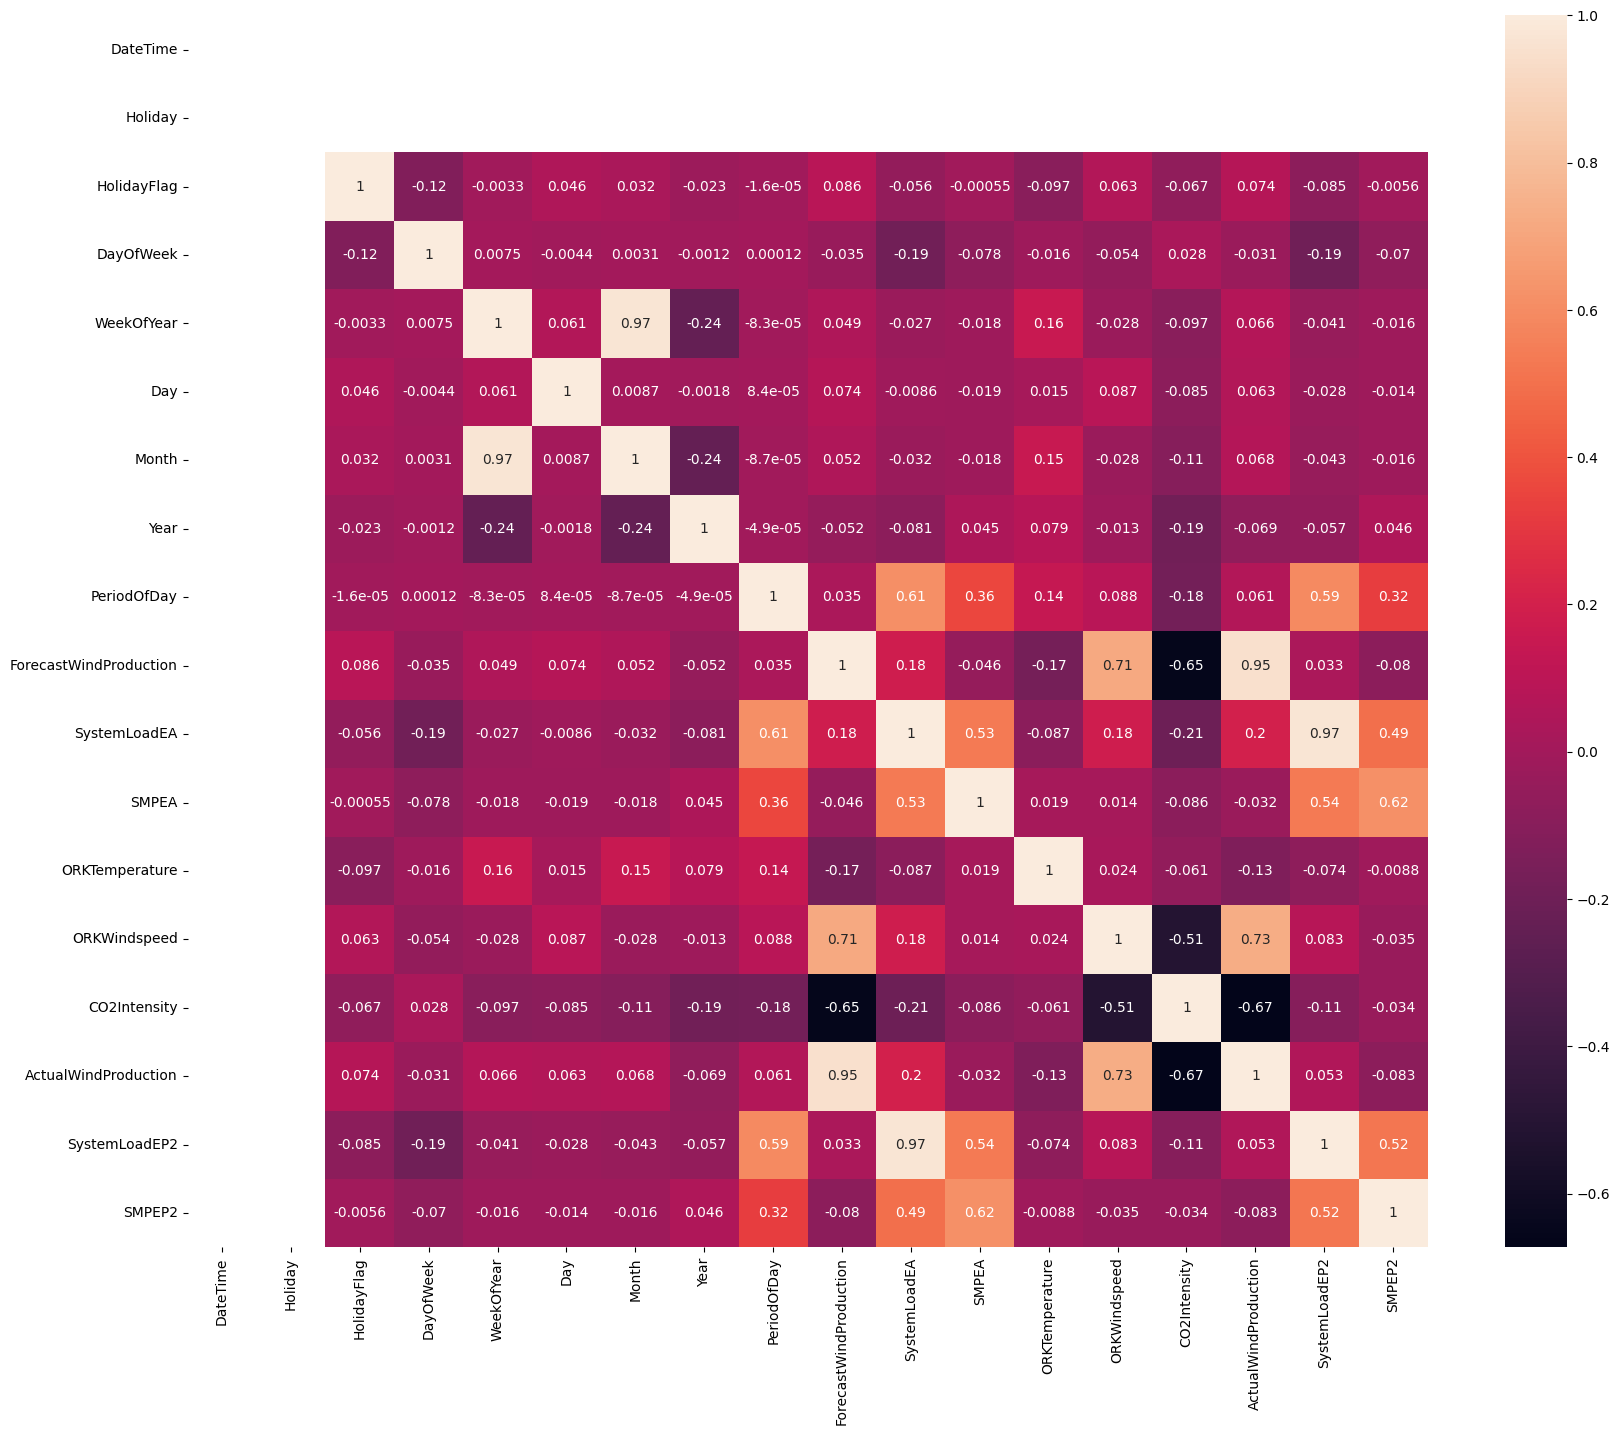

In [16]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

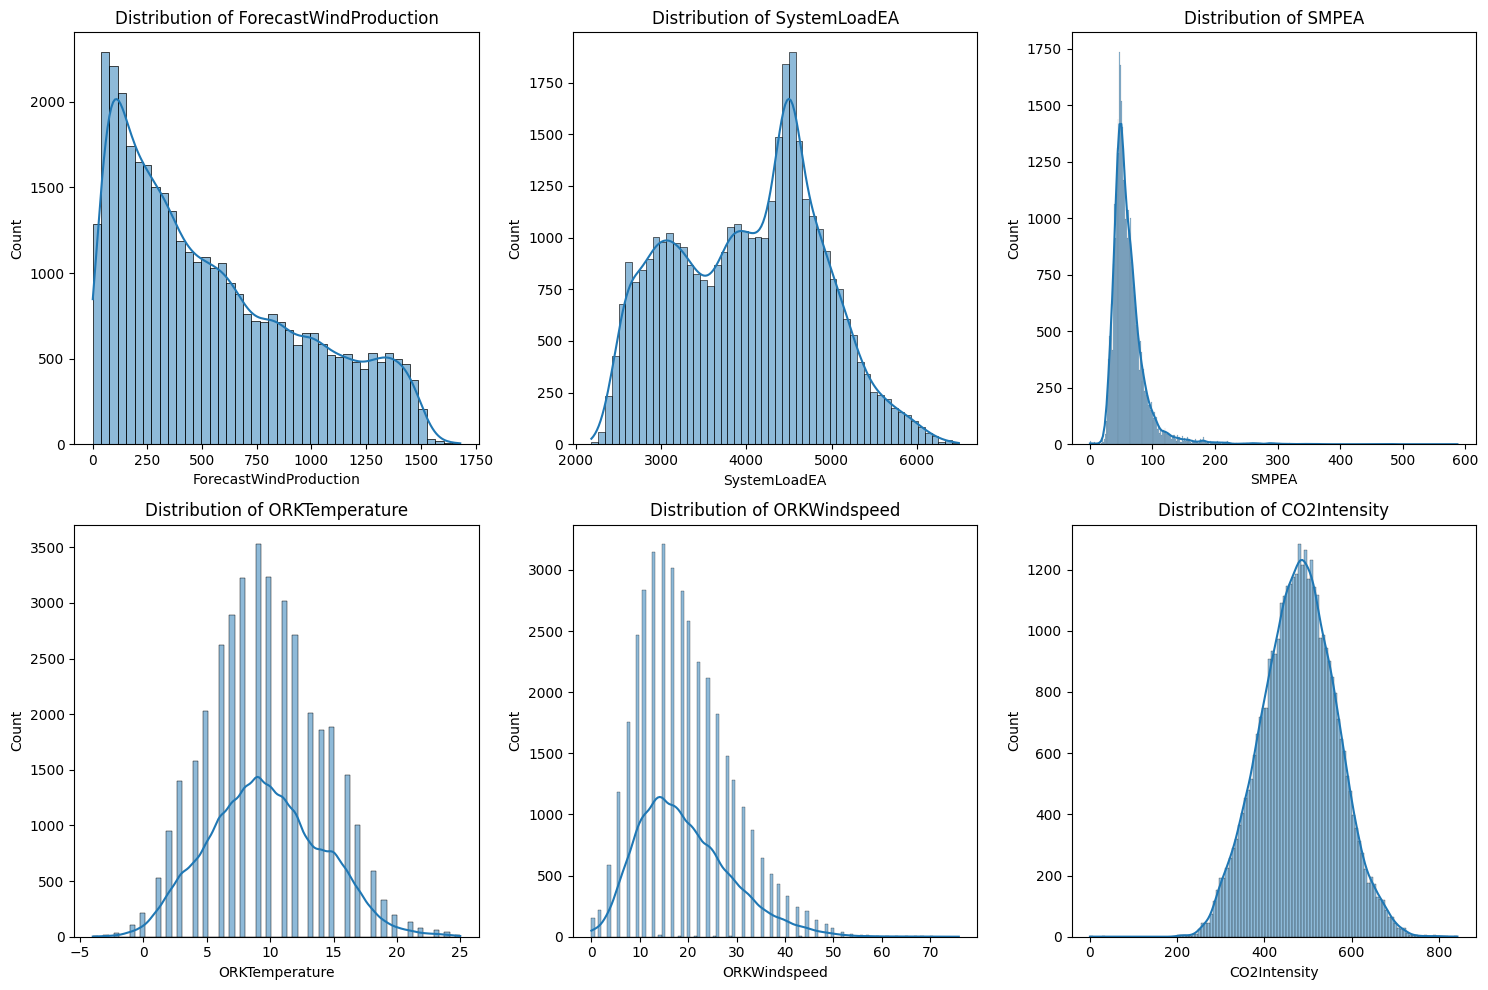

In [17]:
# Distribution plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['ForecastWindProduction'], kde=True)
plt.title('Distribution of ForecastWindProduction')

plt.subplot(2, 3, 2)
sns.histplot(df['SystemLoadEA'], kde=True)
plt.title('Distribution of SystemLoadEA')

plt.subplot(2, 3, 3)
sns.histplot(df['SMPEA'], kde=True)
plt.title('Distribution of SMPEA')

plt.subplot(2, 3, 4)
sns.histplot(df['ORKTemperature'], kde=True)
plt.title('Distribution of ORKTemperature')

plt.subplot(2, 3, 5)
sns.histplot(df['ORKWindspeed'], kde=True)
plt.title('Distribution of ORKWindspeed')

plt.subplot(2, 3, 6)
sns.histplot(df['CO2Intensity'], kde=True)
plt.title('Distribution of CO2Intensity')

plt.tight_layout()
plt.show()

In [18]:
df['ForecastWindProduction'].value_counts()

ForecastWindProduction
54.10      10
61.10      10
129.90      9
287.80      8
81.00       8
           ..
156.02      1
162.44      1
165.48      1
181.34      1
1094.24     1
Name: count, Length: 27475, dtype: int64

In [19]:
df['ForecastWindProduction']=df['ForecastWindProduction'].fillna(df['ForecastWindProduction'].mean())

In [20]:
df['SystemLoadEP2'].value_counts()

SystemLoadEP2
4507.51    4
4430.63    4
4426.84    4
3480.30    3
4701.32    3
          ..
2663.61    1
2815.33    1
2981.36    1
3139.01    1
3517.08    1
Name: count, Length: 35653, dtype: int64

In [21]:
df['SystemLoadEA']=df['SystemLoadEA'].fillna(df['SystemLoadEA'].mean())

In [22]:
df['ORKTemperature']=df['ORKTemperature'].fillna(df['ORKTemperature'].mean())

In [23]:
    df['ORKWindspeed']=df['ORKWindspeed'].fillna(df['ORKWindspeed'].mean())

In [24]:
df['CO2Intensity']=df['CO2Intensity'].fillna(df['CO2Intensity'].mean())

In [25]:
df['ActualWindProduction']=df['ActualWindProduction'].fillna(df['ActualWindProduction'].mean())

In [26]:
df['SystemLoadEP2']=df['SystemLoadEP2'].fillna(df['SystemLoadEP2'].mean())


In [27]:
df['SMPEP2']=df['SMPEP2'].fillna(df['SMPEP2'].mean())

In [28]:
df['SMPEA']=df['SMPEA'].fillna(df['SMPEA'].mean())

In [29]:
x=df[['HolidayFlag','WeekOfYear','Day','Month','Year','PeriodOfDay','ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed','CO2Intensity','ActualWindProduction','SystemLoadEP2']]

In [30]:
y=df['SMPEP2']

In [31]:
from sklearn.preprocessing import scale,normalize

In [32]:
x=scale(x)

In [33]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.205201,1.018479,-1.674147,1.146099,-2.214359,-1.696472,-0.552580,-0.733709,-0.417363,-0.819960,-1.039681,1.421711,-0.435589,-0.742821
1,-0.205201,1.018479,-1.674147,1.146099,-2.214359,-1.624285,-0.536916,-0.956978,-0.417363,-0.819960,-0.850873,1.476898,-0.538694,-0.964100
2,-0.205201,1.018479,-1.674147,1.146099,-2.214359,-1.552098,-0.520576,-1.114978,-0.422324,-1.046071,-0.850873,1.295870,-0.554557,-1.128953
3,-0.205201,1.018479,-1.674147,1.146099,-2.214359,-1.479912,-0.503609,-1.248805,-0.455191,-0.819960,-1.039681,1.248650,-0.549269,-1.257043
4,-0.205201,1.018479,-1.674147,1.146099,-2.214359,-1.407725,-0.485991,-1.360631,-0.898277,-0.819960,-0.850873,1.079690,-0.462026,-1.340471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,4.873264,-1.740164,1.733344,1.425925,0.985909,1.407565,1.532295,-0.102116,-0.874712,-0.819960,0.313446,-2.273846,0.769953,-0.110318
38010,4.873264,-1.740164,1.733344,1.425925,0.985909,1.479752,1.466816,-0.230864,-0.895796,-1.046071,0.512744,-2.355865,0.875702,-0.254939
38011,4.873264,-1.740164,1.733344,1.425925,0.985909,1.551939,1.398416,-0.343864,-0.960290,-1.272182,0.124638,-2.325401,1.166513,-0.386231
38012,4.873264,-1.740164,1.733344,1.425925,0.985909,1.624126,1.327386,-0.443870,-0.895796,-1.046071,-0.462766,-2.072899,1.134788,-0.263252


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [35]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.572851,22.625812,11.245672
KNeighborsRegressor,0.555735,23.074675,8.710077
Gradient Boosting,0.506275,24.325247,13.155879
Ridge,0.421289,26.335744,14.341409
Linear,0.421287,26.335781,14.341496
Lasso,0.417198,26.428669,14.371830
ElasticNet,0.394807,26.931554,14.848486
Extra Tree,0.187260,31.209767,11.447590
Decision Tree,-0.014543,34.869828,11.611039


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [37]:
rf=RandomForestRegressor()

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [39]:
model=rf.fit(x_train, y_train)


In [40]:
tahmin= rf.predict(x_test)


In [41]:
r2_score(y_test, tahmin)


0.6017233894904536

In [42]:
mean_squared_error(y_test, tahmin)


477.3248493746035

In [43]:
mean_absolute_error(y_test, tahmin)

9.140276425689397

In [44]:
# save the model
import pickle
pickle.dump(model,open('my_weather.h5','wb'))

In [45]:
import joblib

In [46]:
joblib.dump(model, 'weather.pkl')


['weather.pkl']